In [2]:
from sqlalchemy import create_engine
import pandas as pd
from postgres_password import pw
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost' 
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = pw 
POSTGRES_DBNAME = 'EmployeeHW_DB'
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
    .format(username=POSTGRES_USERNAME, 
    password=POSTGRES_PASSWORD, 
    ipaddress=POSTGRES_ADDRESS, 
    port=POSTGRES_PORT,  
    dbname=POSTGRES_DBNAME)) 
# Create the connection
engine = create_engine(postgres_str) 
connection = engine.connect()

In [4]:
departments_df = pd.read_sql_table('departments', connection)  
departments_df

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [5]:
employees_df = pd.read_sql_table('employees', engine)  
print(employees_df.count())
employees_df.head()

emp_no          300024
emp_title_id    300024
birth_date      300024
first_name      300024
last_name       300024
sex             300024
hire_date       300024
dtype: int64


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
dept_emp_df = pd.read_sql_table('dept_emp', engine)  
dept_emp_df.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [7]:
dept_manager_df = pd.read_sql_table('dept_manager', engine)  
dept_manager_df.head()

,dept_no,dept_mgr_emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [8]:
dept_manager_df = pd.read_sql_table('dept_manager', engine)  
dept_manager_df.head()

,dept_no,dept_mgr_emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [9]:
salaries_df = pd.read_sql_table('salaries', engine)  
salaries_df.head()

,emp_no,salary
0,10001,"$60,117.00"
1,10002,"$65,828.00"
2,10003,"$40,006.00"
3,10004,"$40,054.00"
4,10005,"$78,228.00"


In [10]:
title_df = pd.read_sql_table('title', engine)  
title_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [11]:
employee_salaries_merge_df = pd.merge(employees_df,salaries_df, on = 'emp_no') 
employee_salaries_merge_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,"$40,000.00"
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,"$53,422.00"
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,"$48,973.00"
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,"$40,000.00"
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,"$40,000.00"
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,"$69,696.00"
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,"$75,355.00"
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,"$61,886.00"
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,"$62,772.00"


In [12]:
employee_salaries_title_merge_df = pd.merge(employee_salaries_merge_df, title_df, left_on = 'emp_title_id' ,right_on = 'title_id', how = 'left') 
employee_salaries_title_merge_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,"$40,000.00",s0001,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,"$53,422.00",e0002,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,"$48,973.00",e0002,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,"$40,000.00",s0001,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,"$40,000.00",e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,"$69,696.00",s0001,Staff
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,"$75,355.00",e0002,Engineer
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,"$61,886.00",s0001,Staff
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,"$62,772.00",s0001,Staff


In [13]:
employee_salaries_title_merge_df['salary'] = employee_salaries_title_merge_df['salary'].str.replace('[$,,]', '').astype(float)
employee_salaries_title_merge_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000.0,s0001,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422.0,e0002,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973.0,e0002,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000.0,s0001,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000.0,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696.0,s0001,Staff
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355.0,e0002,Engineer
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886.0,s0001,Staff
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772.0,s0001,Staff


In [14]:
null_values = employee_salaries_title_merge_df.isnull().sum()
null_values

emp_no          0
emp_title_id    0
birth_date      0
first_name      0
last_name       0
sex             0
hire_date       0
salary          0
title_id        0
title           0
dtype: int64

Text(0, 0.5, '# Employees')

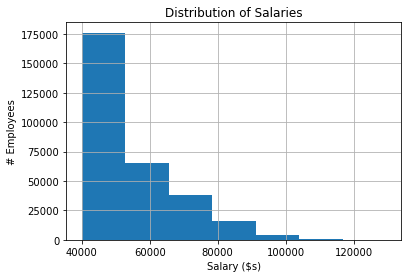

In [20]:
df = pd.DataFrame(employee_salaries_title_merge_df["salary"])
hist = df.hist(bins=7)
plt.title("Distribution of Salaries")
plt.xlabel("Salary ($s)")
plt.ylabel("# Employees")

In [18]:
by_title_avg_salary = employee_salaries_title_merge_df.groupby('title')
average_salary = by_title_avg_salary['salary'].mean().map("${:,.2f}".format)
by_title_avg_salary_df = pd.DataFrame({"Average Salary":average_salary})
by_title_avg_salary_df = by_title_avg_salary_df.reset_index()
by_title_avg_salary_df

,title,Average Salary
0,Assistant Engineer,"$48,564.43"
1,Engineer,"$48,535.34"
2,Manager,"$51,531.04"
3,Senior Engineer,"$48,506.80"
4,Senior Staff,"$58,550.17"
5,Staff,"$58,465.38"
6,Technique Leader,"$48,582.90"


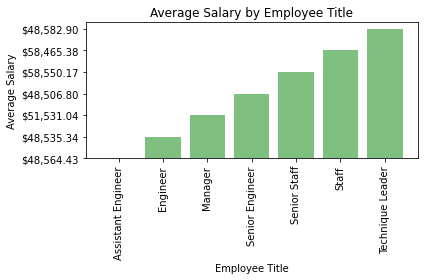

In [19]:
# Generate a bar plot showing the average salary by employee title
x_axis = np.arange(len(by_title_avg_salary_df))
plt.figure()

plt.bar(x_axis,by_title_avg_salary_df['Average Salary'],color='g', alpha=0.5, align="center",)

#Format bar chart
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, by_title_avg_salary_df['title'], rotation="vertical")

plt.title("Average Salary by Employee Title")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.tight_layout()